In [1]:
import pandas as pd

df = pd.read_json('/home/shubham/petasense_data/measurement_data_37_L2_x_acceleration.json')

In [2]:
df.head()

,location_id,location_name,machine_name,measurements
0,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-..."
1,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-..."
2,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-..."
3,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-..."
4,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-..."


In [3]:
df['time_domain'] = df['measurements'].map(lambda v:v['data']['time_domain'])

In [4]:
df.head()

,location_id,location_name,machine_name,measurements,time_domain
0,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[0.0955108190244, 0.142378048945, 0.0320730141..."
1,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[0.0152892355027, 0.0409164900223, -8.54867669..."
2,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[-0.0377654335053, 0.272838970081, 0.215688720..."
3,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[0.193336548881, 0.053697712511, 0.01051361225..."
4,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[-0.0843585196817, 0.0716561945188, 0.02896771..."


In [5]:
df['peak'] = df['time_domain'].map(lambda x: abs(max(x, key = abs)))

In [6]:
df.head()

,location_id,location_name,machine_name,measurements,time_domain,peak
0,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[0.0955108190244, 0.142378048945, 0.0320730141...",0.641561
1,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[0.0152892355027, 0.0409164900223, -8.54867669...",0.587924
2,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[-0.0377654335053, 0.272838970081, 0.215688720...",0.512187
3,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[0.193336548881, 0.053697712511, 0.01051361225...",0.776067
4,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[-0.0843585196817, 0.0716561945188, 0.02896771...",0.789510


In [7]:
def square(list):
    return [i**2 for i in list]

In [9]:
import numpy as np
df['rms'] = np.nan

In [11]:
from math import *
df['rms'] = df['time_domain'].map(lambda x: sqrt(np.mean(square(x))))

In [12]:
df.head()

,location_id,location_name,machine_name,measurements,time_domain,peak,rms
0,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[0.0955108190244, 0.142378048945, 0.0320730141...",0.641561,0.171748
1,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[0.0152892355027, 0.0409164900223, -8.54867669...",0.587924,0.151245
2,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[-0.0377654335053, 0.272838970081, 0.215688720...",0.512187,0.157736
3,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[0.193336548881, 0.053697712511, 0.01051361225...",0.776067,0.178330
4,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[-0.0843585196817, 0.0716561945188, 0.02896771...",0.789510,0.181860


In [13]:
df['crest_factor'] = df['peak']/df['rms']

In [14]:
df.head()

,location_id,location_name,machine_name,measurements,time_domain,peak,rms,crest_factor
0,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[0.0955108190244, 0.142378048945, 0.0320730141...",0.641561,0.171748,3.735475
1,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[0.0152892355027, 0.0409164900223, -8.54867669...",0.587924,0.151245,3.887226
2,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[-0.0377654335053, 0.272838970081, 0.215688720...",0.512187,0.157736,3.247112
3,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[0.193336548881, 0.053697712511, 0.01051361225...",0.776067,0.178330,4.351854
4,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[-0.0843585196817, 0.0716561945188, 0.02896771...",0.789510,0.181860,4.341312


In [15]:
df['p2p'] = df['time_domain'].map(lambda x: max(x) - min(x))

In [16]:
df.head()

,location_id,location_name,machine_name,measurements,time_domain,peak,rms,crest_factor,p2p
0,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[0.0955108190244, 0.142378048945, 0.0320730141...",0.641561,0.171748,3.735475,1.278770
1,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[0.0152892355027, 0.0409164900223, -8.54867669...",0.587924,0.151245,3.887226,1.091752
2,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[-0.0377654335053, 0.272838970081, 0.215688720...",0.512187,0.157736,3.247112,1.001194
3,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[0.193336548881, 0.053697712511, 0.01051361225...",0.776067,0.178330,4.351854,1.501042
4,128,L2,Water Injection Pump - 1A,"{u'sampling_size': 8192, u'timestamp': u'2016-...","[-0.0843585196817, 0.0716561945188, 0.02896771...",0.789510,0.181860,4.341312,1.450610


In [17]:
import matplotlib.pyplot as plt
plt.plot(df['time_domain'][0])

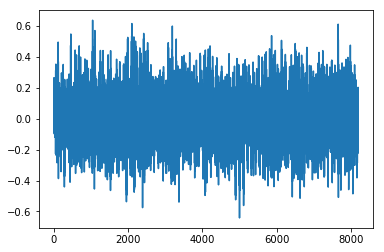

In [18]:
plt.show()

In [19]:
freq_domain = np.fft.fft(df['time_domain'][0])

In [20]:
freq_domain

array([  1.46549439e-14 +0.00000000e+00j,
        -2.09832152e-14 +3.54161145e-14j,
        -1.92068583e-14 -1.06026299e-14j, ...,
        -2.12404783e-14 +6.17966048e-15j,
        -7.53473469e-15 +1.94909827e-14j,  -1.89143884e-14 -3.42780851e-14j])

In [22]:
df['freq_domain'] = df['time_domain'].map(lambda v: np.fft.fft(v))

In [23]:
df['freq_domain'][0]

array([  1.46549439e-14 +0.00000000e+00j,
        -2.09832152e-14 +3.54161145e-14j,
        -1.92068583e-14 -1.06026299e-14j, ...,
        -2.12404783e-14 +6.17966048e-15j,
        -7.53473469e-15 +1.94909827e-14j,  -1.89143884e-14 -3.42780851e-14j])

In [24]:
import matplotlib.pyplot as plt
plt.plot(df['freq_domain'][0])

/home/shubham/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


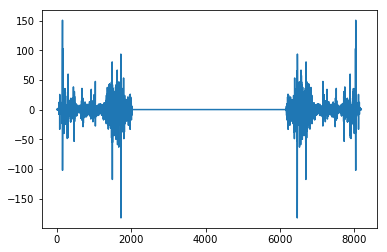

In [25]:
plt.show()

In [26]:
df['freq_domain'] = df['freq_domain'].map(lambda v: np.hanning(v))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()